In [1]:
import yfinance as yf
import pandas as pd

### Defining the symbols

In [2]:
# List of stock symbols for the TECH top 30 holdings
symbols = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "FB", "NVDA", "TSLA", "JPM", "V",
    "JNJ", "PG", "BRK-A", "BRK-B", "XOM", "WMT", "BAC", "PFE", "CVX", "KO",
    "DIS", "VZ", "HD", "MRK", "INTC", "PEP", "UNH", "CSCO", "CMCSA", "ABBV",
    "BA", "MCD", "NKE", "MMM", "ORCL", "IBM", "ACN", "CRM", "QCOM", "ADBE",
    "TXN", "AMD", "AMGN", "MDT", "PM", "COST", "TMO", "LMT", "HON", "LIN",
    "NEE", "DHR", "RTX", "UNP", "CAT", "UPS", "LOW", "SPG", "C", "AXP",
    "GS", "BLK", "MS", "SCHW", "USB", "T", "DUK", "SO", "SBUX", "NFLX",
    "INTU", "ADP", "PYPL", "SQ", "MA", "FISV", "CTSH", "EPAM", "GLOB", "NICE",
    "SPLK", "TWLO", "WDAY", "ZM", "DDOG", "MDB", "NET", "SNOW", "ESTC", "HUBS",
    "MTCH", "ROKU", "SHOP", "TEAM", "TTD", "UBER", "LYFT", "PINS", "SPOT", "COIN",
    "MELI", "BIDU", "BABA", "JD", "NTES", "PDD", "TCEHY", "BILI", "ZTO", "VIPS",
    "YUMC", "BZUN", "TAL", "GSX", "IQ", "HUYA", "DOYU", "YY", "JOYY", "VNET",
    "KING", "EDU", "TME", "BILI", "ZTO", "VIPS", "YUMC", "BZUN", "TAL", "GSX",
    "IQ", "HUYA", "DOYU", "YY", "JOYY", "VNET", "KING", "EDU", "TME", "BILI",
    "ZTO", "VIPS", "YUMC", "BZUN", "TAL", "GSX", "IQ", "HUYA", "DOYU", "YY",
    "JOYY", "VNET", "KING", "EDU", "TME", "BILI", "ZTO", "VIPS", "YUMC", "BZUN",
    "TAL", "GSX", "IQ", "HUYA", "DOYU", "YY", "JOYY", "VNET", "KING", "EDU",
    "TME", "BILI", "ZTO", "VIPS", "YUMC", "BZUN", "TAL", "GSX", "IQ", "HUYA",
    "DOYU", "YY", "JOYY", "VNET", "KING", "EDU", "TME", "BILI", "ZTO", "VIPS",
    "YUMC", "BZUN", "TAL", "GSX", "IQ", "HUYA", "DOYU", "YY", "JOYY", "VNET"
]

# Define the start and end dates
from datetime import datetime, timedelta

end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date
start_date = (datetime.today() - timedelta(days=180)).strftime('%Y-%m-%d')  # 6 months ago

### Downloading data filtering by availability

In [3]:
############################################
# EXECUTE THIS CELL ONLY ONCE
############################################

# # Download historical data for each symbol and save to CSV
# import logging

# # Set up logging
# logging.basicConfig(filename='data_processing.log', level=logging.ERROR)

# high_quality_tickers = []
# for symbol in symbols:
#     if len(high_quality_tickers) >= 30:
#         break
#     print(f"Downloading data for {symbol}...")
    
#     # Attempt to download at least 1000 data points
#     df = yf.download(symbol, period="max", interval="1d")
    
#     # Check if the DataFrame has at least 1000 data points
#     if len(df) < 1000:
#         print(f"Skipping {symbol} due to insufficient data points.")
#         continue
    
#     # Check if the DataFrame is empty or has more than 50% NaNs
#     if df.empty or df.isna().mean().mean() > 0.5:
#         print(f"Skipping {symbol} due to insufficient data.")
#         continue
    
#     # Check for NaNs and skip if any are present
#     if df.isna().any().any():
#         print(f"Skipping {symbol} due to presence of NaNs.")
#         continue
    
#     df.insert(0, 'Ticker', symbol)  # Add a Ticker column
#     df.reset_index(inplace=True)  # Ensure Date is a column
#     df = df[['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume']]  # Reorder columns
#     output_file = f"{symbol}_last_6_months.csv"
#     df.to_csv(output_file, index=False)  # Save to CSV without the index
    
#     # Remove the second row from the CSV file
#     with open(output_file, 'r') as file:
#         lines = file.readlines()
#     with open(output_file, 'w') as file:
#         file.writelines(lines[:1] + lines[2:])
    
#     print(f"Data for {symbol} has been saved to {output_file}")
#     high_quality_tickers.append(symbol)

# # Concatenate all CSV files into a single DataFrame and save as one file
# import glob

# # Get a list of all CSV files created above
# csv_files = glob.glob("*_last_6_months.csv")

# # Read each CSV file and concatenate them into a single DataFrame
# df_list = []
# for file in csv_files:
#     try:
#         df = pd.read_csv(file, usecols=['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume'])
#         df_list.append(df)
#     except ValueError as e:
#         if "Usecols do not match columns, columns expected but not found: ['Date', 'Ticker']" in str(e):
#             logging.error(f"Error in file {file}: {e}")
#         else:
#             raise

# # Concatenate all DataFrames
# combined_df = pd.concat(df_list, ignore_index=True)

# # Save the combined DataFrame to a single CSV file
# combined_df.to_csv("combined_last_6_months.csv", index=False)

# print("All data has been concatenated and saved to combined_last_6_months.csv")


### Processing downloaded data

In [4]:
combined_df = pd.read_csv("combined_last_6_months.csv", dtype={'Ticker': str, 'Close': float, 'High': float, 'Low': float, 'Open': float, 'Volume': float}, parse_dates=['Date'])

# Compute the daily returns
combined_df['Daily_Return'] = combined_df.groupby('Ticker')['Close'].pct_change()

# Save the DataFrame with daily returns to a new CSV file
combined_df.to_csv("combined_last_6_months_with_returns.csv", index=False)

print("Daily returns have been computed and saved to combined_last_6_months_with_returns.csv")

combined_df.head()

Daily returns have been computed and saved to combined_last_6_months_with_returns.csv


,Date,Ticker,Close,High,Low,Open,Volume,Daily_Return
0,2004-06-23,CRM,4.276116,4.300977,3.667018,3.729171,43574400.0,NaN
1,2004-06-24,CRM,4.166727,4.397936,4.102088,4.363130,8887200.0,-0.025581
2,2004-06-25,CRM,3.928060,4.164241,3.925574,4.104574,6710000.0,-0.057279
3,2004-06-28,CRM,3.977782,4.029991,3.838560,3.977782,2270800.0,0.012658
4,2004-06-29,CRM,4.077227,4.151810,3.935518,3.977782,2112000.0,0.025000


In [12]:
len(combined_df)/30

8635.7

In [5]:
print(list(combined_df['Ticker'].unique()))

['CRM', 'NVDA', 'ON', 'INTC', 'ORCL', 'LRCX', 'KLAC', 'SNPS', 'ADBE', 'GOOGL', 'ASML', 'WDC', 'STM', 'META', 'AMZN', 'AVGO', 'NXPI', 'CSCO', 'AMAT', 'AMD', 'MSFT', 'GOOG', 'MCHP', 'ADI', 'TXN', 'IBM', 'AAPL', 'MU', 'TSM', 'QCOM']


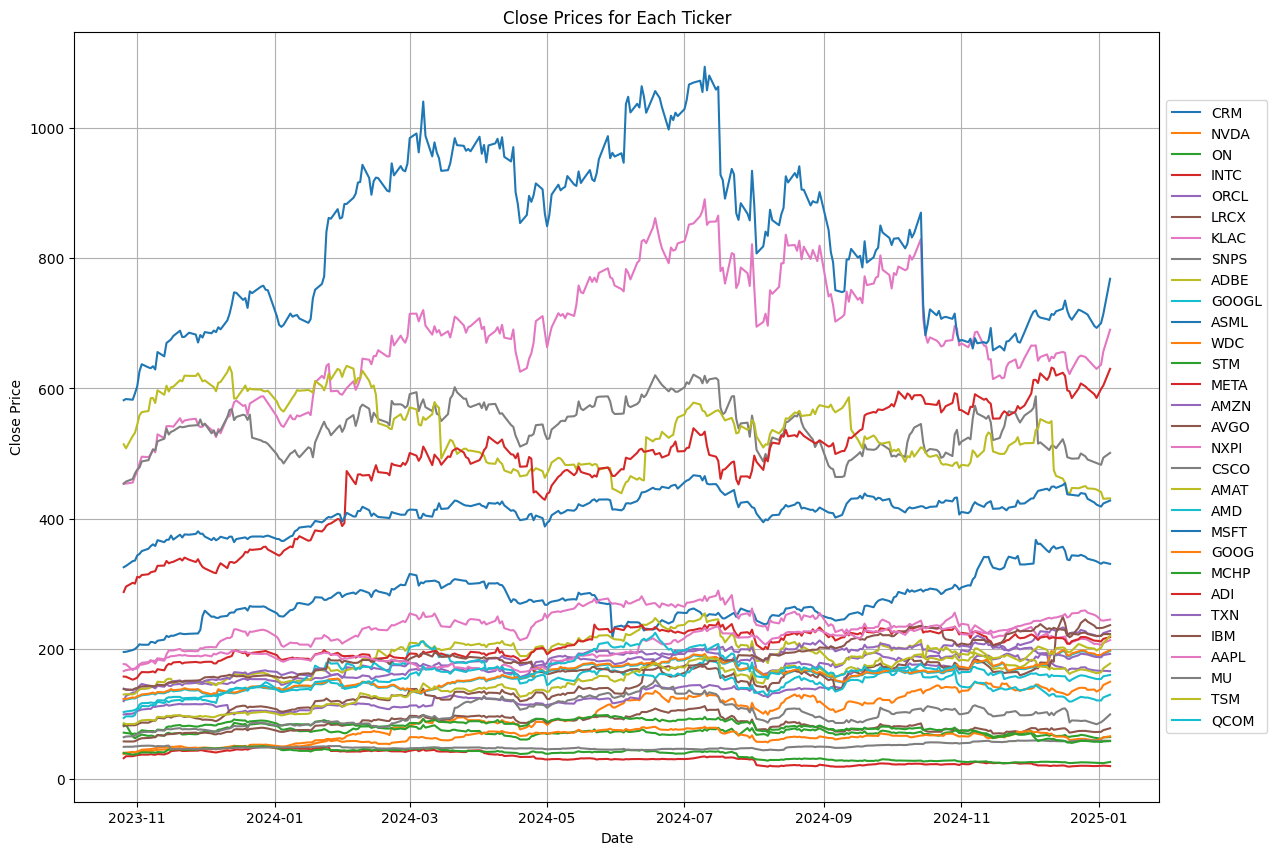

In [10]:
import matplotlib.pyplot as plt

# Plot the real data (Close prices) for each ticker
plt.figure(figsize=(14, 10))
for ticker in combined_df['Ticker'].unique():
    ticker_data = combined_df[combined_df['Ticker'] == ticker].tail(300)
    plt.plot(ticker_data['Date'], ticker_data['Close'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices for Each Ticker')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


/var/folders/zt/2fc2dgl527j0fpwfk176q2k40000gn/T/ipykernel_86057/3722293725.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(tickers))


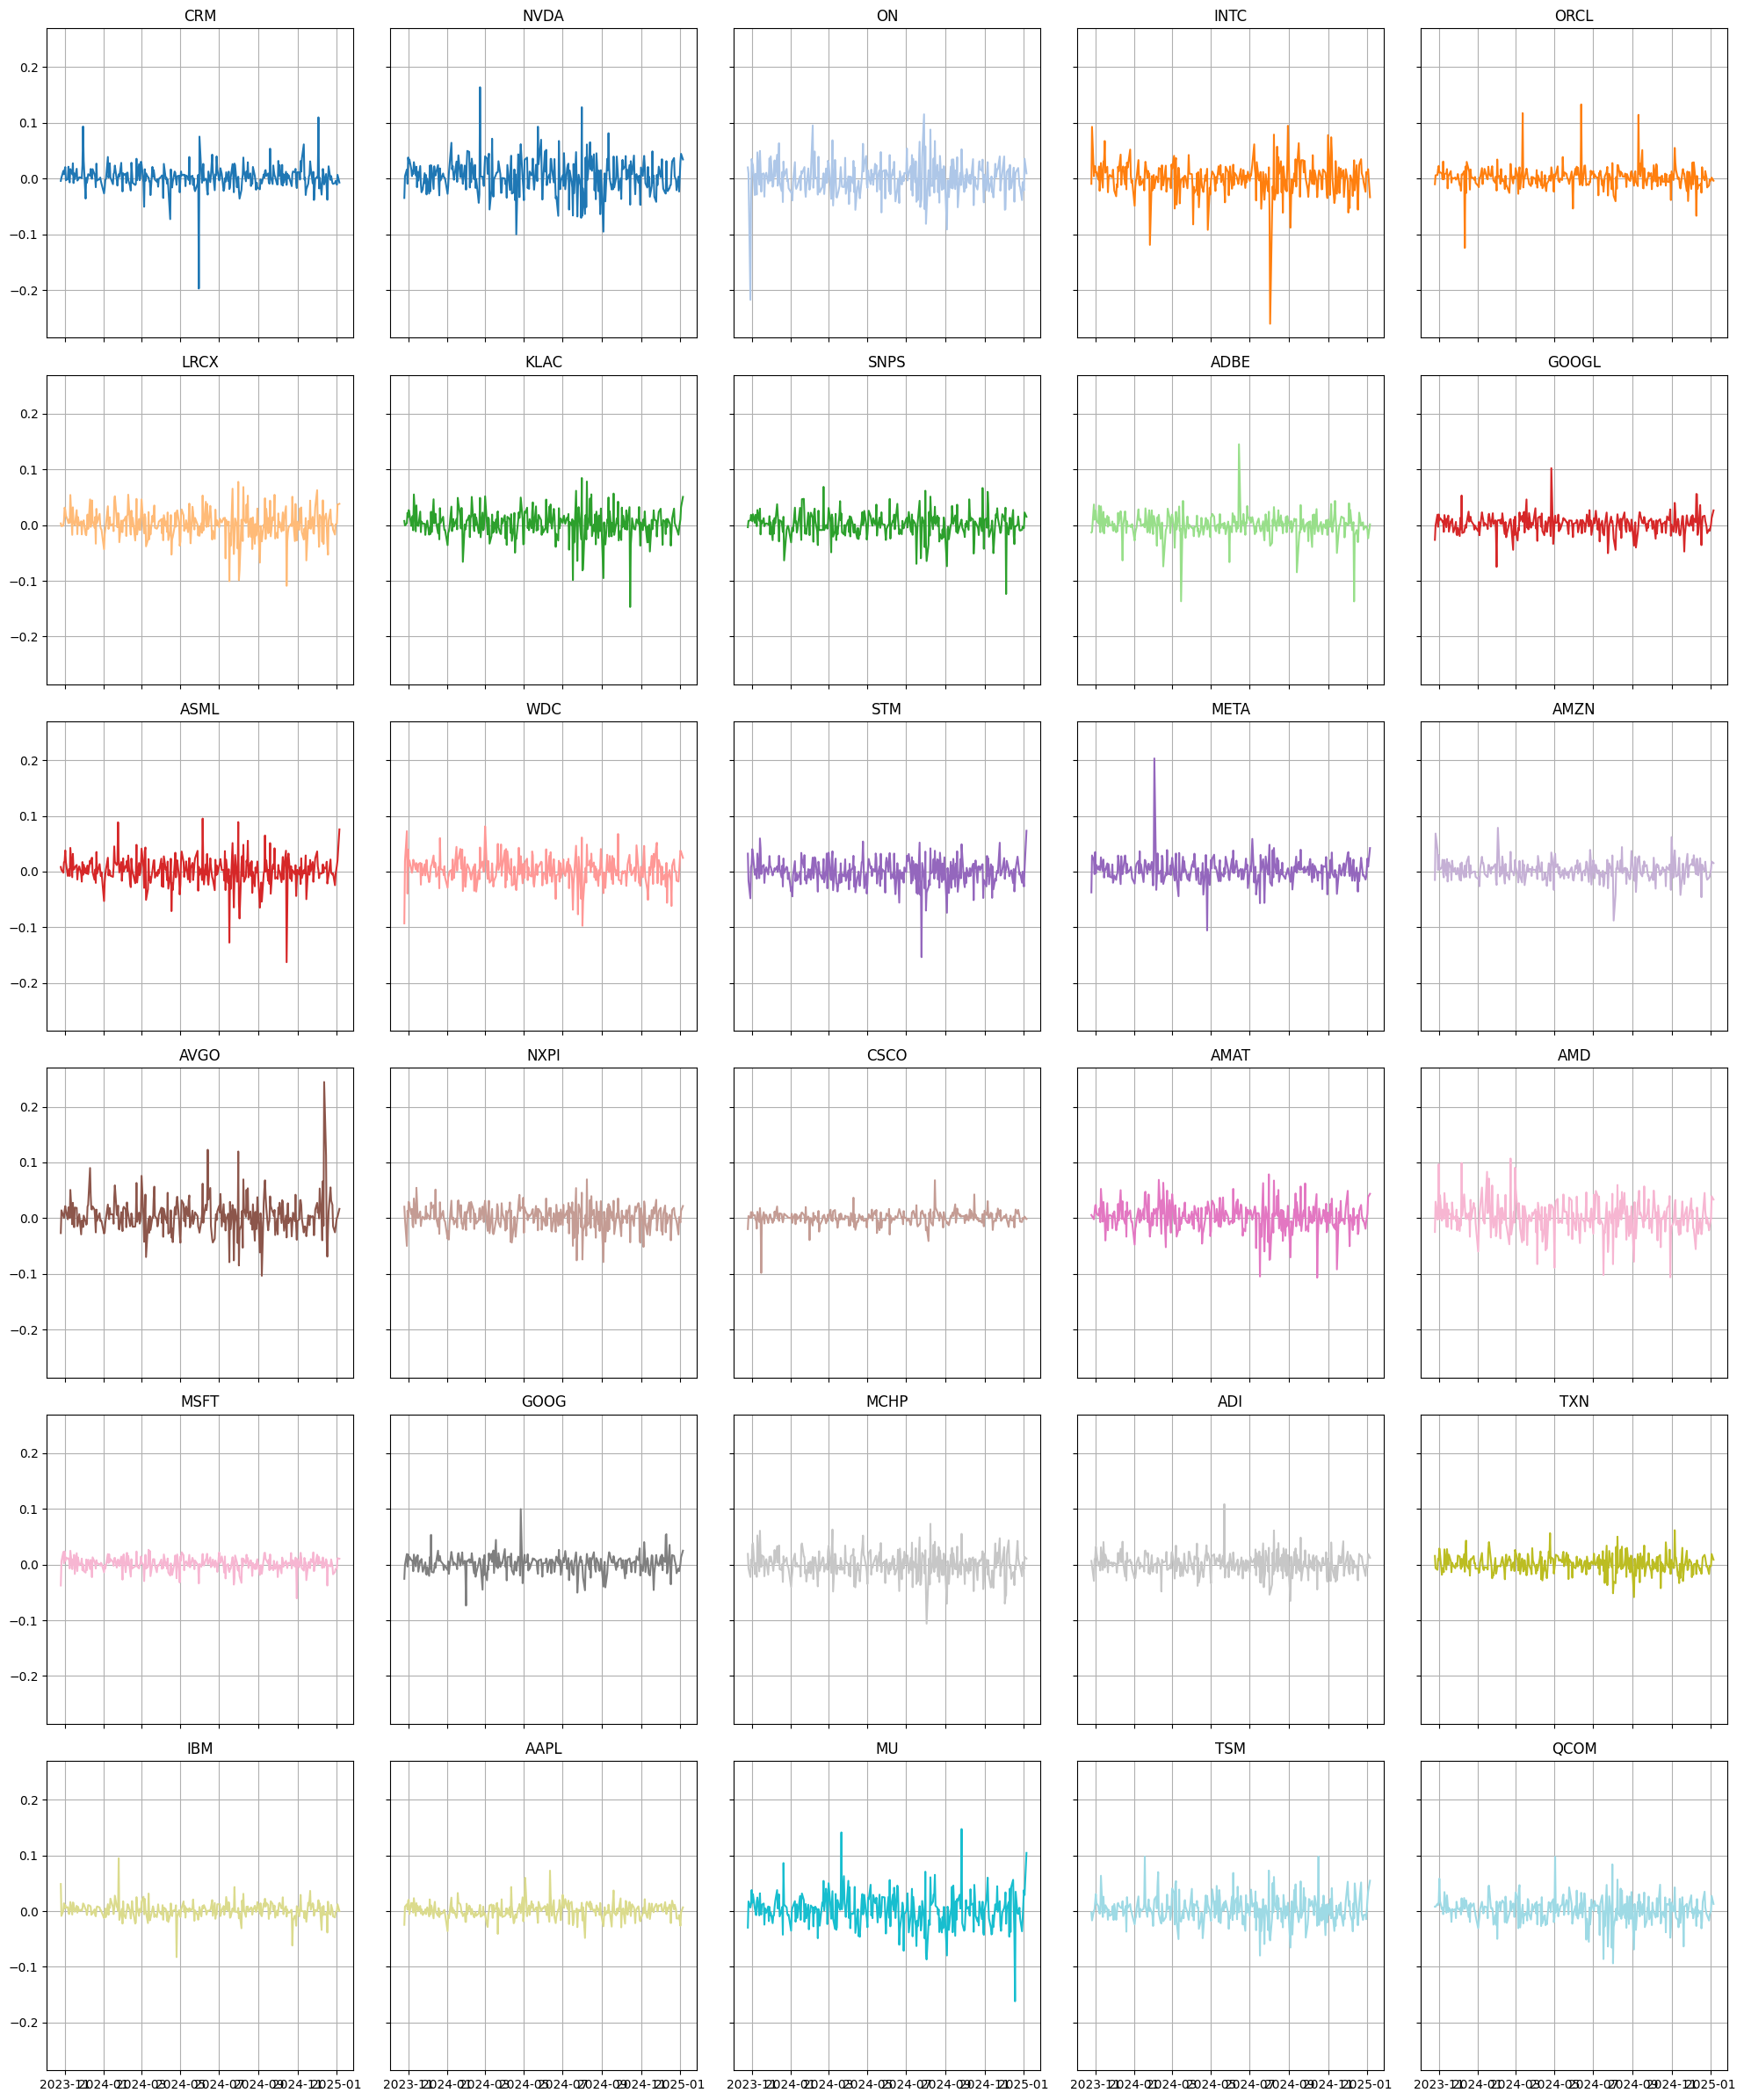

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get the list of unique tickers
tickers = combined_df['Ticker'].unique()

# Create a figure with subplots arranged in 5 columns and 6 rows
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 24), sharex=True, sharey=True)
axes = axes.flatten()

# Generate a color map
colors = cm.get_cmap('tab20', len(tickers))

# Plot the last 300 daily returns for each ticker
for i, ticker in enumerate(tickers):
    ticker_data = combined_df[combined_df['Ticker'] == ticker].tail(300)
    axes[i].plot(ticker_data['Date'], ticker_data['Daily_Return'], label=ticker, color=colors(i))
    axes[i].set_title(ticker)
    axes[i].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Calculate covariance matrix and then PCA

Ticker          AAPL      ADBE       ADI      AMAT       AMD      AMZN  \
Date                                                                     
2012-05-21  0.058260  0.022357  0.022229  0.028957  0.048253  0.019921   
2012-05-22 -0.007678  0.000000 -0.001952 -0.002838 -0.022222 -0.012746   
2012-05-23  0.024400  0.005311 -0.003352  0.012334 -0.012987  0.009056   
2012-05-24 -0.009184 -0.019888  0.008969 -0.027179 -0.009868 -0.009389   
2012-05-25 -0.005360  0.001902  0.005277  0.015414  0.033223 -0.010918   

Ticker          ASML      AVGO       CRM      CSCO  ...      NVDA      NXPI  \
Date                                                ...                       
2012-05-21  0.031194  0.029647  0.023836  0.012143  ...  0.017384  0.072773   
2012-05-22  0.010155  0.011647  0.002684  0.003599  ... -0.012205  0.002372   
2012-05-23 -0.007914  0.071954  0.007762 -0.002390  ...  0.024711  0.032182   
2012-05-24 -0.003450 -0.030131 -0.029215 -0.017975  ... -0.026527 -0.025676   
2012-05

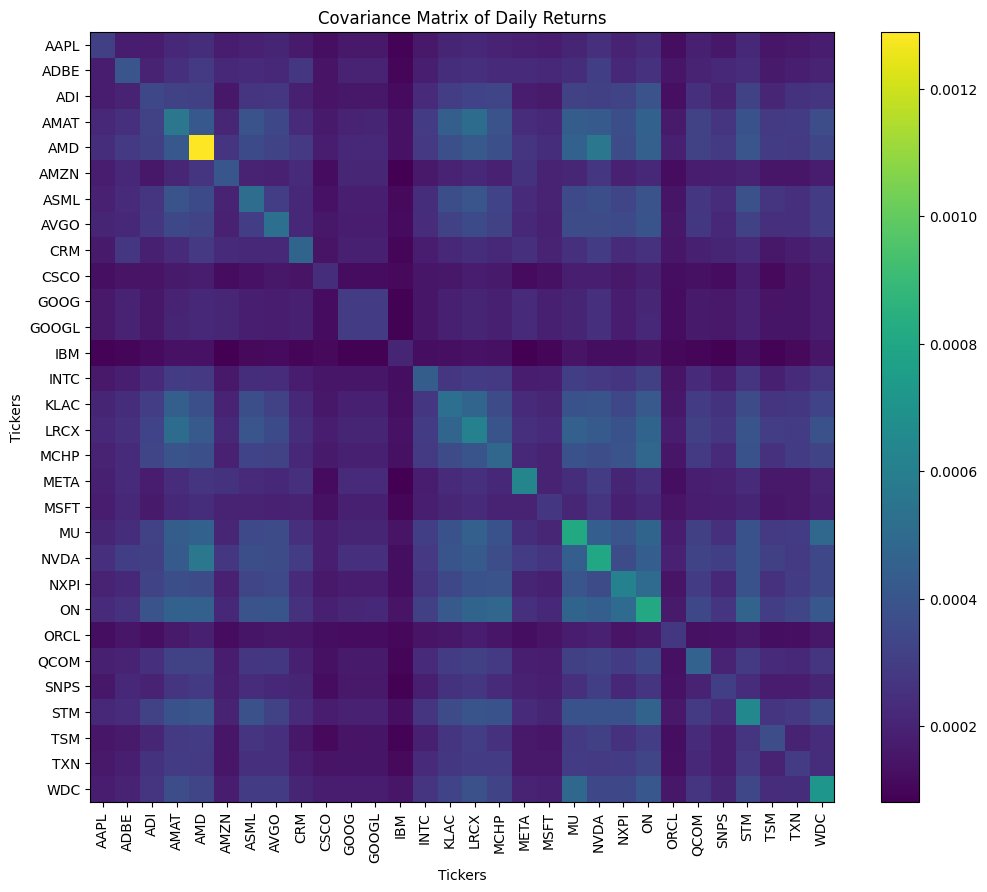

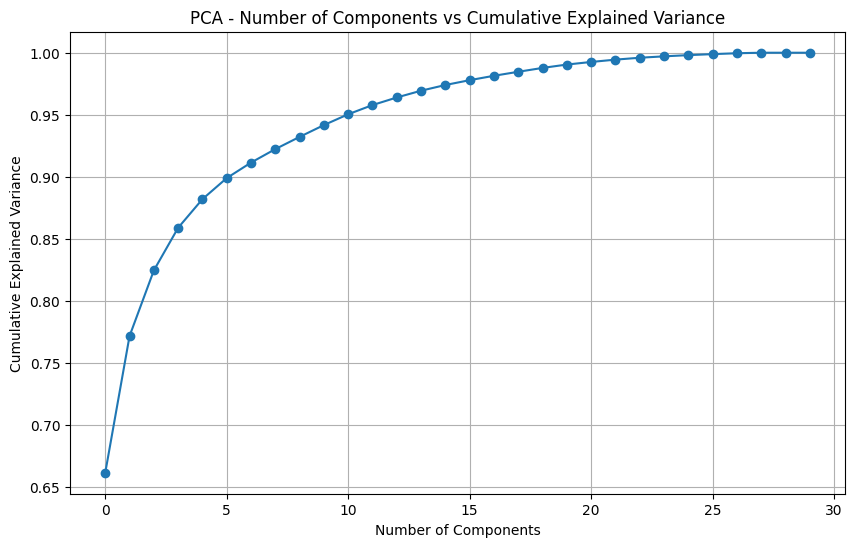

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ensure each 'Date' and 'Ticker' combination is unique by aggregating
combined_df = combined_df.groupby(['Date', 'Ticker']).agg({'Daily_Return': 'mean'}).reset_index()

# Pivot the DataFrame to get a matrix of daily returns
pivot_df = combined_df.pivot(index='Date', columns='Ticker', values='Daily_Return')

# Check for NaN values and remove them
pivot_df.dropna(inplace=True)

print(pivot_df.head())

# Compute the covariance matrix of the daily returns
cov_matrix = pivot_df.cov()

# Verify the shape of the covariance matrix
print("Covariance matrix shape:", cov_matrix.shape)

# Plot the covariance matrix
plt.figure(figsize=(12, 10))
plt.imshow(cov_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Covariance Matrix of Daily Returns')
plt.xlabel('Tickers')
plt.ylabel('Tickers')
plt.xticks(ticks=np.arange(len(cov_matrix.columns)), labels=cov_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(cov_matrix.index)), labels=cov_matrix.index)
plt.grid(False)
plt.show()

# Apply PCA on the covariance matrix
pca = PCA()
pca.fit(cov_matrix)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Number of Components vs Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Plotting the first 30 daily and the total daily returns for each ticker in a single plot

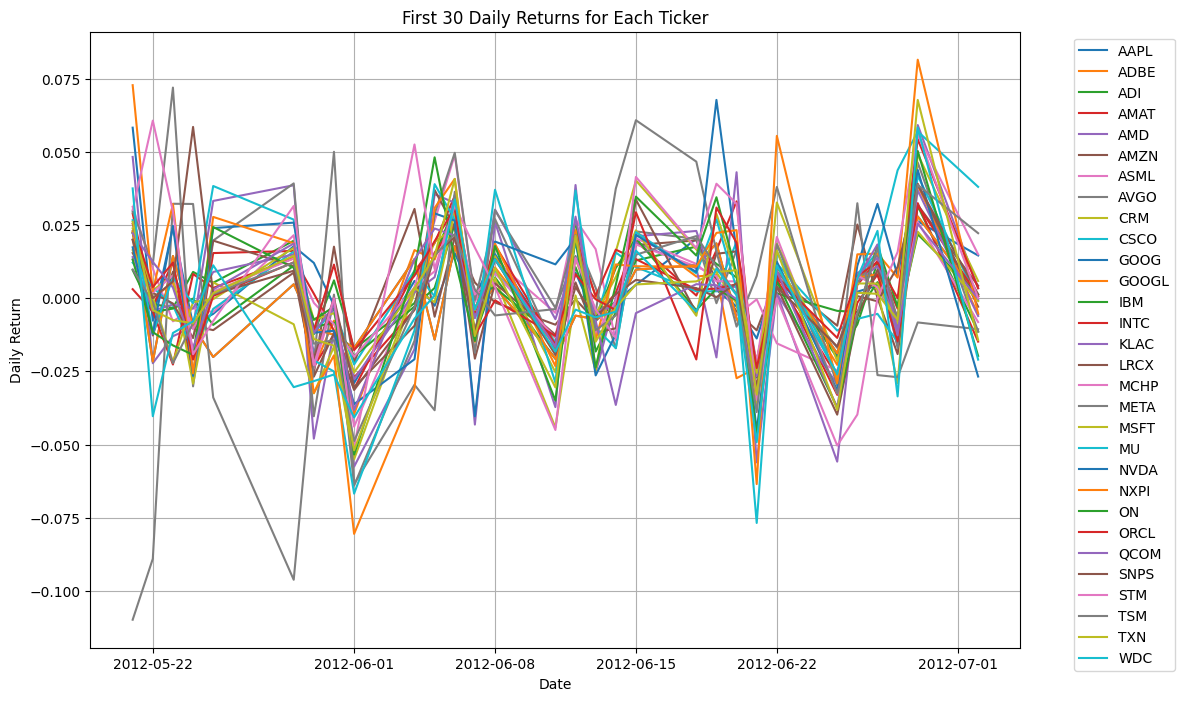

In [11]:
# Plot the first 30 daily returns for each ticker in a single plot
plt.figure(figsize=(12, 8))

for ticker in pivot_df.columns:
    ticker_data = pivot_df[ticker].head(30)
    plt.plot(ticker_data.index, ticker_data.values, label=ticker)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('First 30 Daily Returns for Each Ticker')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True)
plt.show()


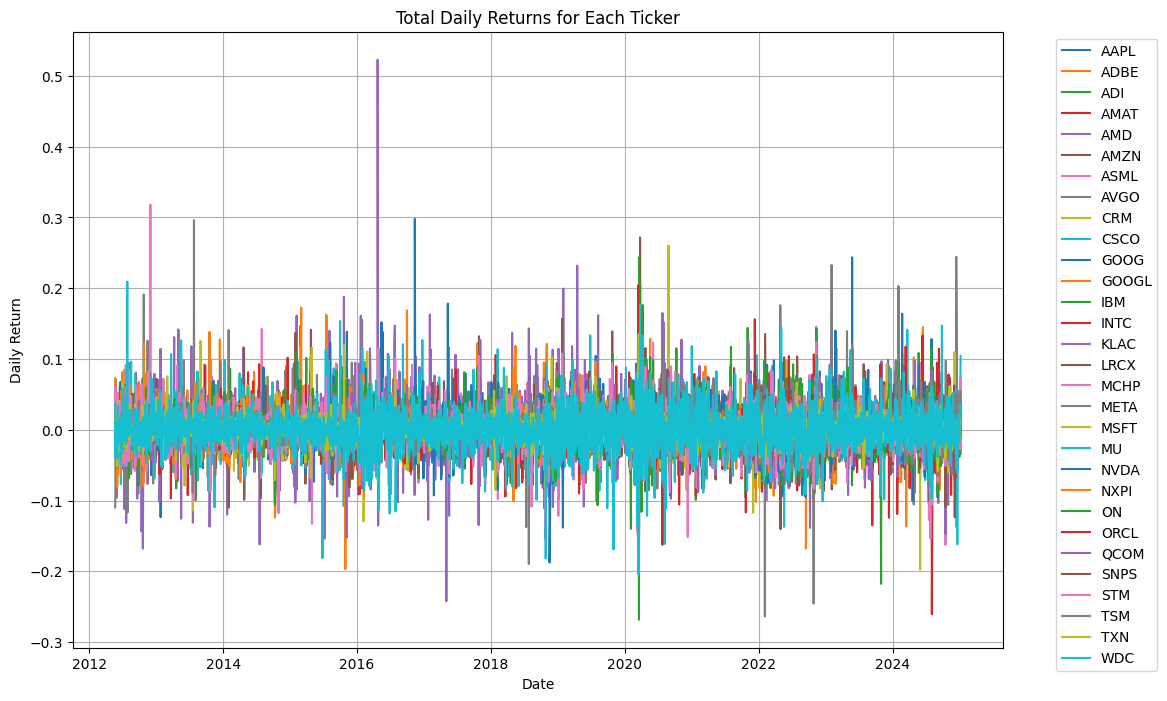

In [12]:
# Plot the total daily returns for each ticker in a single plot
plt.figure(figsize=(12, 8))

for ticker in pivot_df.columns:
    ticker_data = pivot_df[ticker]
    plt.plot(ticker_data.index, ticker_data.values, label=ticker)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Total Daily Returns for Each Ticker')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True)
plt.show()

## SVD

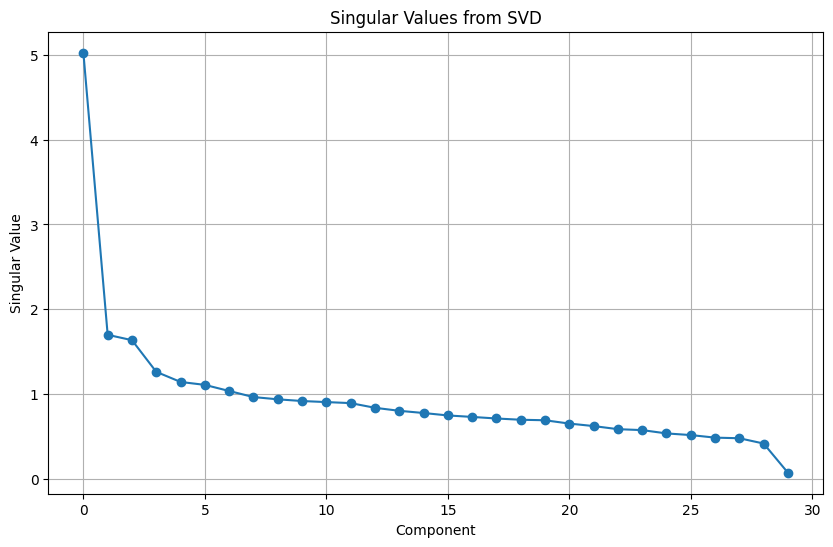

In [94]:
# Compute the Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(pivot_df, full_matrices=False)

# Plot the singular values
plt.figure(figsize=(10, 6))
plt.plot(S, marker='o')
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Values from SVD')
plt.grid(True)
plt.show()


### Plotting the covariance matrix

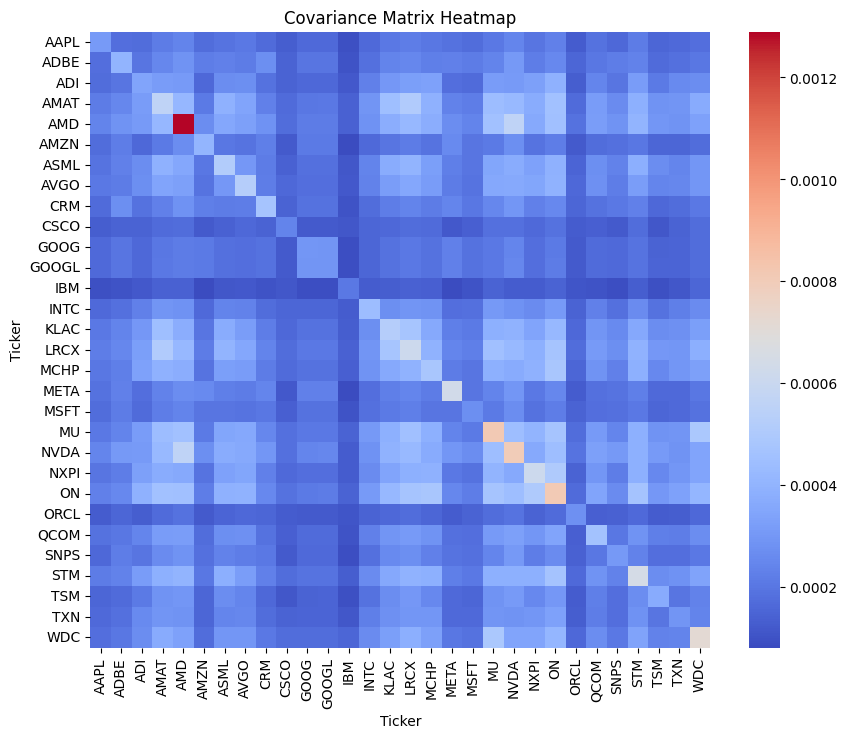

In [13]:
import seaborn as sns
# Plot the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Covariance Matrix Heatmap')
plt.show()
